# Forest future

In this notebook I will conclude whether world's forests are safe from disappearing or not. I will focus on future trends
and those areas, which I consider as the most important ones.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import os

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
forest_data = pd.read_csv('Forest_Area.csv')

forest_data.head()

,CountryID,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015-2020","Total Forest Area Affected by Fire, 2015"
0,1.0,WORLD,4236433.42,4158049.52,4106316.94,...,4058930.81,13003000.0,31.13,10200,98040
1,4.0,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286.0,1.85,...,...
2,8.0,Albania,788.80,769.30,782.07,789.19,788.90,2740.0,28.79,...,...
3,12.0,Algeria,1667.00,1579.00,1918.00,1956,1949.00,238174.0,0.82,5.4,...
4,16.0,American Samoa,18.07,17.73,17.43,17.28,17.13,20.0,85.65,...,0


We have got 233 different countries with data collected for the whole planet. Now it's time to replace the missing data and preprocess it to make it clearer for further analysis

In [3]:
forest_data.head()
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CountryID                                             237 non-null    float64
 1   Country and Area                                      237 non-null    object 
 2   Forest Area, 1990                                     237 non-null    float64
 3   Forest Area, 2000                                     237 non-null    float64
 4   Forest Area, 2010                                     237 non-null    float64
 5   Forest Area, 2015                                     237 non-null    object 
 6   Forest Area, 2020                                     237 non-null    float64
 7   Total Land Area, 2020                                 237 non-null    float64
 8   Forest Area as a Proportion of Total Land Area, 2020  237 no

In [4]:
forest_data['Forest Area, 2015'].fillna(forest_data['Forest Area, 2010'],  inplace = True)
for col in forest_data.columns[2:7]:
    forest_data[col] = pd.to_numeric(forest_data[col], errors='coerce')

forest_data.info()
#to check whether our values are really float or not
#print(forest_data['Forest Area, 2015'].unique())
#print(forest_data['Forest Area, 2015'].dtype)

for col in forest_data.columns[2:]:  
    forest_data[col] = pd.to_numeric(forest_data[col], errors='coerce')

# Obsłuż wartości NaN, np. zastąp średnią lub medianą, lub usuń wiersze zawierające NaN
forest_data.fillna(method='ffill', inplace=True) 
forest_data.replace([np.inf, -np.inf], np.nan, inplace=True)

forest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CountryID                                             237 non-null    float64
 1   Country and Area                                      237 non-null    object 
 2   Forest Area, 1990                                     237 non-null    float64
 3   Forest Area, 2000                                     237 non-null    float64
 4   Forest Area, 2010                                     237 non-null    float64
 5   Forest Area, 2015                                     236 non-null    float64
 6   Forest Area, 2020                                     237 non-null    float64
 7   Total Land Area, 2020                                 237 non-null    float64
 8   Forest Area as a Proportion of Total Land Area, 2020  237 no

,CountryID,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015-2020","Total Forest Area Affected by Fire, 2015"
0,1.0,WORLD,4236433.42,4158049.52,4106316.94,NaN,4058930.81,13003000.0,31.13,10200.0,98040.0
1,4.0,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286.0,1.85,10200.0,98040.0
2,8.0,Albania,788.80,769.30,782.07,789.19,788.90,2740.0,28.79,10200.0,98040.0
3,12.0,Algeria,1667.00,1579.00,1918.00,1956.00,1949.00,238174.0,0.82,5.4,98040.0
4,16.0,American Samoa,18.07,17.73,17.43,17.28,17.13,20.0,85.65,5.4,0.0


# Forestation future trends 
Now, after cleaning the data, let's show forestation trend over the countries

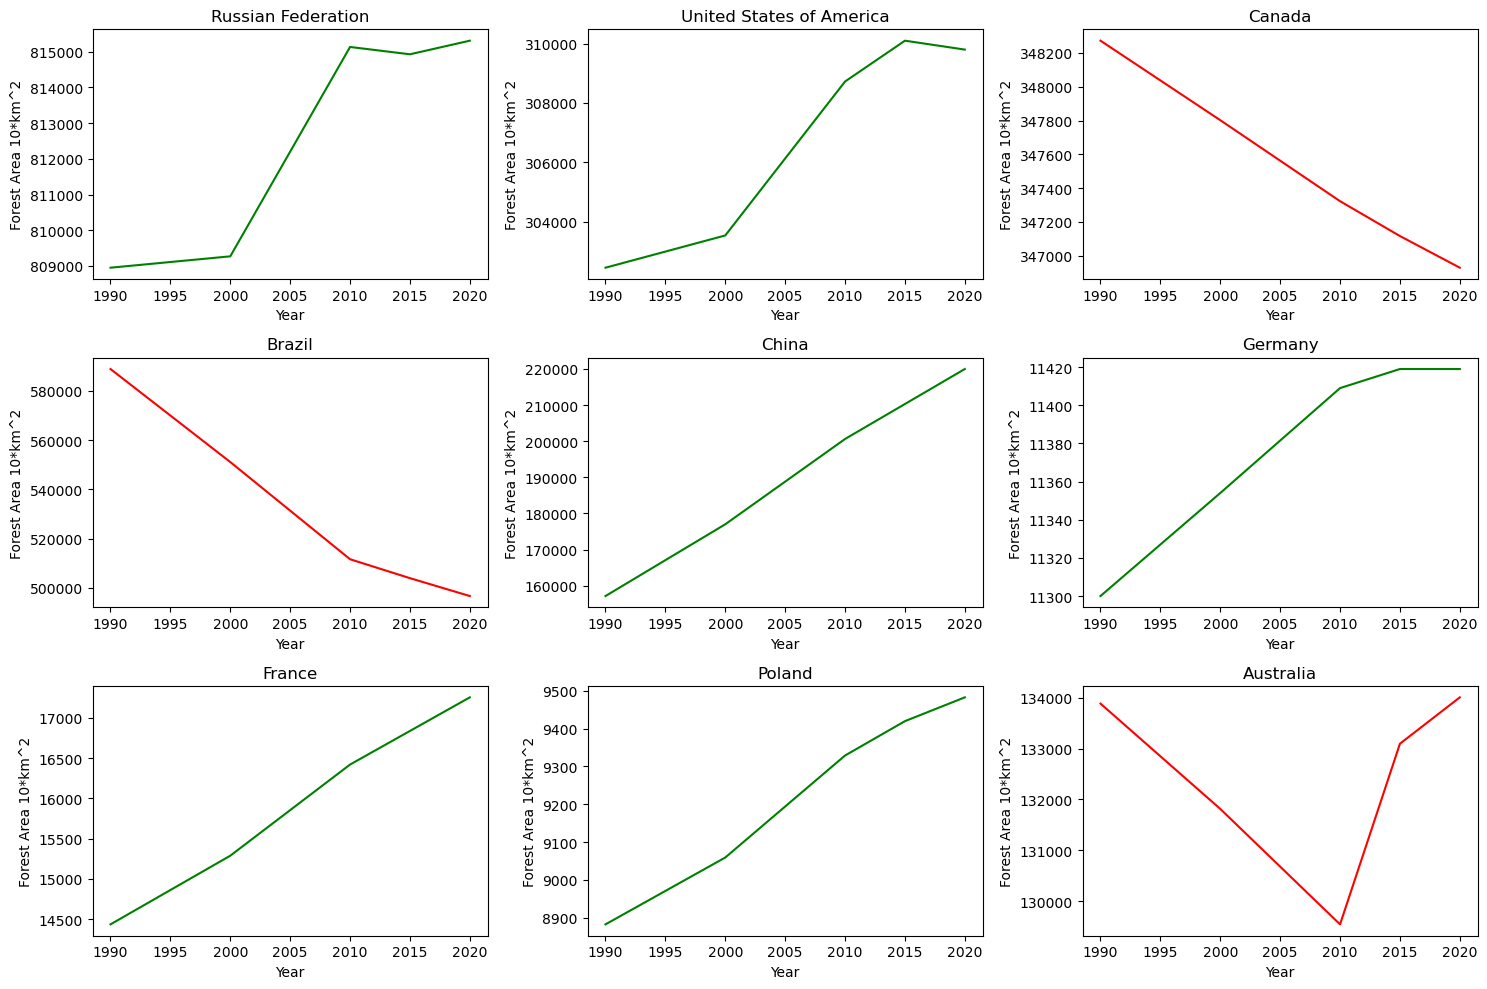

In [11]:
selected_countries = ['Russian Federation', 'United States of America', 'Canada', 'Brazil', 'China', 
                      'Germany', 'France', 'Poland', 'Australia']

years = np.array([1990, 2000, 2010, 2015, 2020]).reshape(-1, 1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  #flattening for easier indexing

for i, country in enumerate(selected_countries):
    country_data = forest_data[forest_data['Country and Area'] == country]
    
    if not country_data.empty:
        for index, row in country_data.iterrows():
            forest_area = pd.to_numeric(row[2:7], errors='coerce').values.reshape(-1, 1)
            model = np.polyfit(years.flatten(), forest_area.flatten(), 1)
            slope = model[0]  
            if slope < -0.1:
                trend_color = "red"
            elif -0.1 <= slope <= 0.1:
                trend_color = "grey"
            else:
                trend_color = "green"
            axes[i].plot(years.flatten(), forest_area, label=row['Country and Area'], color=trend_color)
            
        axes[i].set_title(country)
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel("Forest Area 10*km^2")

plt.tight_layout()
plt.show()


### Overall trend is negative, but in smaller countries it is probably reversed. Let's see if I'm right.

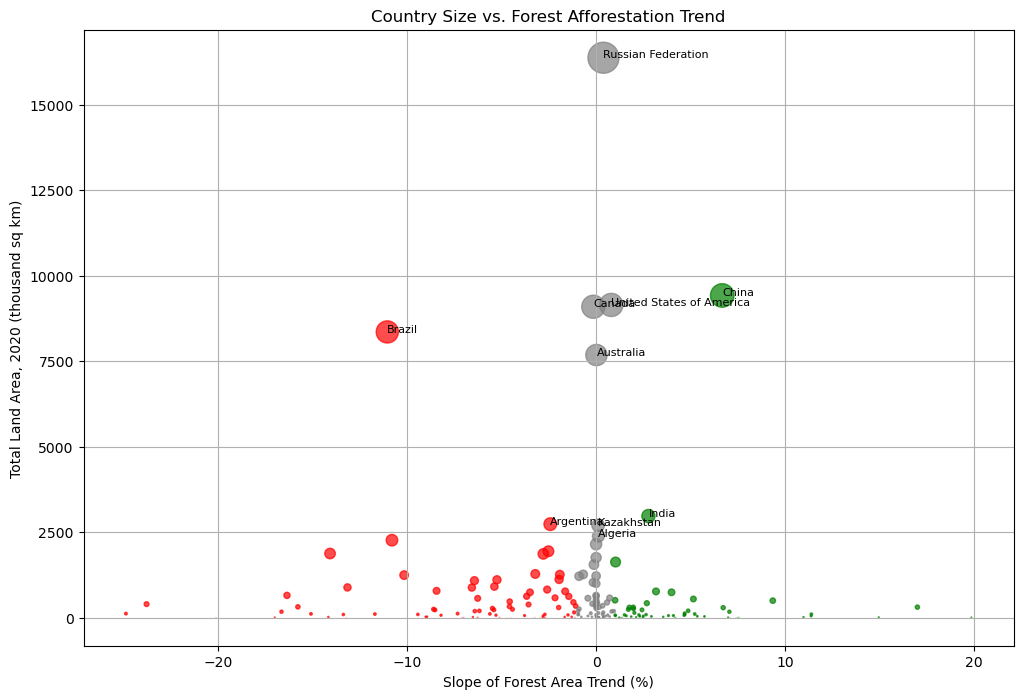

Correlation between trend of afforestation and total land areaa: -0.011914498438777255


In [15]:
top_10_countries = countries_forest_data.nlargest(10, 'Total Land Area, 2020')

countries_forest_data.loc[:, 'Slope of Forest Area Trend (%)'] = ((countries_forest_data['Forest Area, 2020'] - countries_forest_data['Forest Area, 1990']) / countries_forest_data['Total Land Area, 2020']) * 100

colors = np.where(countries_forest_data['Slope of Forest Area Trend (%)'] > 1, 'green', 
                  np.where(countries_forest_data['Slope of Forest Area Trend (%)'] < -1, 'red', 'grey'))

sizes = countries_forest_data['Total Land Area, 2020'] / countries_forest_data['Total Land Area, 2020'].max() * 500  # Skalowanie wielkości kropki

plt.figure(figsize=(12, 8))
plt.scatter(countries_forest_data['Slope of Forest Area Trend (%)'],
            countries_forest_data['Total Land Area, 2020']/100, 
            color=colors, alpha=0.7, s=sizes)

for i, txt in enumerate(top_10_countries['Country and Area']):
    plt.annotate(txt, (top_10_countries['Slope of Forest Area Trend (%)'].iloc[i], top_10_countries['Total Land Area, 2020'].iloc[i]/100), fontsize=8)

plt.ylabel('Total Land Area, 2020 (thousand sq km)')
plt.xlabel('Slope of Forest Area Trend (%)')
plt.title('Country Size vs. Forest Afforestation Trend')
plt.grid(True)
plt.show()

correlation = countries_forest_data[['Slope of Forest Area Trend (%)', 'Total Land Area, 2020']].corr().iloc[0, 1]
print("Correlation between trend of afforestation and total land areaa:", correlation)


# Future of forests
Now it's time to predict the future of our forests using linear regression, as the trend seems to be quite linear.

In [ ]:
future_years = np.array([2021, 2025, 2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)  

predictions = {}

for index, row in countries_forest_data.iterrows():
    country_name = row['Country and Area']
    forest_area = row[['Forest Area, 1990', 'Forest Area, 2000', 'Forest Area, 2010', 'Forest Area, 2015', 'Forest Area, 2020']].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(years, forest_area)

    predicted_forest_area = model.predict(future_years).flatten()
    predictions[country_name] = predicted_forest_area

predictions_df = pd.DataFrame(predictions, index=future_years.flatten())

print(predictions_df.head())

Visualize these trends

In [ ]:
output_dir = "prediction_charts"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for country in predictions_df.columns:
    plt.figure(figsize=(10, 6))
    future_years = predictions_df.index.tolist()
    historical_forest_area = countries_forest_data.loc[countries_forest_data['Country and Area'] == country,
    ['Forest Area, 1990', 'Forest Area, 2000', 'Forest Area, 2010', 'Forest Area, 2015', 'Forest Area, 2020']].values.flatten()
    
    plt.plot(years, historical_forest_area, label='Historical Data', marker='o')
   
    plt.plot(future_years, predictions_df[country], label='Predictions', linestyle='--', marker='x')

    confidence_interval = predictions_df[country].std()  
    upper_bound = predictions_df[country] + confidence_interval
    lower_bound = predictions_df[country] - confidence_interval
    
    # Drawing confidence_interval
    plt.fill_between(future_years, lower_bound, upper_bound, color='orange', alpha=0.15, label='Confidence interval')
    
    plt.title(f'Forest Area Predictions for {country}')
    plt.xlabel('Year')
    plt.ylabel('Forest Area 10 * km^2')
    plt.legend()
    plt.grid(True)
    
    # Saving predictions to file, all predictions can be seen in prediction_charts folder
    filename = f"{output_dir}/{country}".replace(" ", "_").replace(",", "")
    plt.savefig(filename)
    plt.close()  

You can now go into prediction_charts folder to look at all predictions and look at the chosen country to see its predicted trend of afforestation.
Last thing I'm going to do is to validate my model using R^2 parameter.

In [ ]:
from sklearn.metrics import r2_score

y_true = historical_forest_area
y_pred = predictions_df[country].values

y_pred = y_pred[:-2] #to fit R^2 score

r_squared = r2_score(y_true, y_pred)
print("R squared:", r_squared)